# Metoda Branch & Cut

"**[The Ongoing Story of Gomory Cuts](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.399.656&rep=rep1&type=pdf)**", Gerard Cornu

> In the three decades from 1963 to 1993, Gomory cuts were considered impractical. Several quotes from the late 80s and early 90s illustrate this widely held view. Williams [11]: “Although cutting plane methods may appear mathematically fairly elegant, they have not proved very successful on large problems.” Nemhauser and Wolsey [9]: “They do not work well in practice. They fail because an extremely large number of these cuts frequently are required for convergence.

"[**Revival of the Gomory cuts in the 1990's**](https://www.researchgate.net/publication/220462226_Revival_of_the_Gomory_cuts_in_the_1990's)", Gérard Cornuéjols

> In the early 90’s, the research community was unanimous: In order to solve integer programs of meaningful sizes, one had to exploit the structure of the underlying combinatorial problem; Gomory cuts (Gomory, 1960, 1963) made elegant theory (because they did not require knowledge of the underlying structure) but were utterly useless in practice (because they did not use the underlying structure!). I will come back shortly to these widely held beliefs.


## Dane problemu

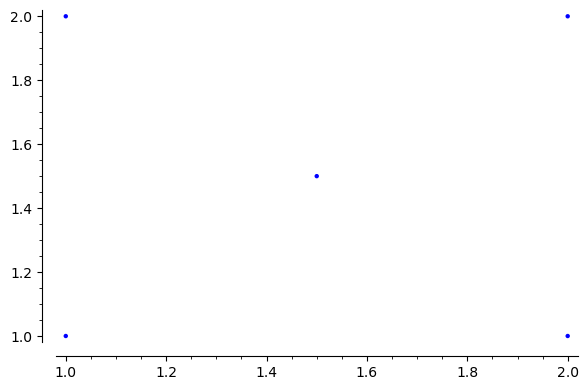

In [1]:
cities = """
1 1 1
2 2 1
3 2 2
4 1 2
5 1.5 1.5
"""

def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

coords = []
for t in grouped(map(float, cities.split()),3):
    coords.append((t[1], t[2]))

list_plot(coords)

## Problem liniowy (wersja naiwna)

In [2]:
# Funkcja pomocnicza - odległość pomiędzy miastami

from scipy.spatial import distance

# Generujemy problem liniowy

var_names = [f'x_{i}{j}' for i, a in enumerate(coords) for j, b in enumerate(coords) if a != b]
edges= [(a, b) for a in coords for b in coords if a != b]

A = matrix(QQ, 0, len(edges))
b = matrix(QQ, 0, 1)
c = vector(QQ, [-distance.euclidean(a,b) for a in coords for b in coords if a != b])

# z każdego wierzchołka wychodzi dokładnie jedna krawędź
for a in coords:
    row = vector(QQ, len(edges))
    for i, (d, _) in enumerate(edges):
        if d == a:
            row[i] = 1
    A = A.stack(row)
    b = b.stack(vector(QQ, [1]))
    A = A.stack(-row)
    b = b.stack(vector(QQ, [-1]))

# do każdego wierzchołka wchodzi dokładnie jedna krawędź
for a in coords:
    row = vector(QQ, len(edges))
    for i, (_, d) in enumerate(edges):
        if d == a:
            row[i] = 1
    A = A.stack(row)
    b = b.stack(vector(QQ, [1]))

# Wartości w przedziale [0,1]

for i, (u, v) in enumerate(edges):
    row = vector(QQ, len(edges))
    row[i] = 1
    A = A.stack(row)
    b = b.stack(vector(QQ, [1]))

p = InteractiveLPProblemStandardForm(A, b, c, x=var_names)
show(p)

LP problem (use typeset mode to see details)

## Rozwiązanie

(1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0)
0 ((1.0, 1.0), (2.0, 1.0))
4 ((2.0, 1.0), (1.0, 1.0))
10 ((2.0, 2.0), (1.0, 2.0))
15 ((1.0, 2.0), (1.5, 1.5))
18 ((1.5, 1.5), (2.0, 2.0))


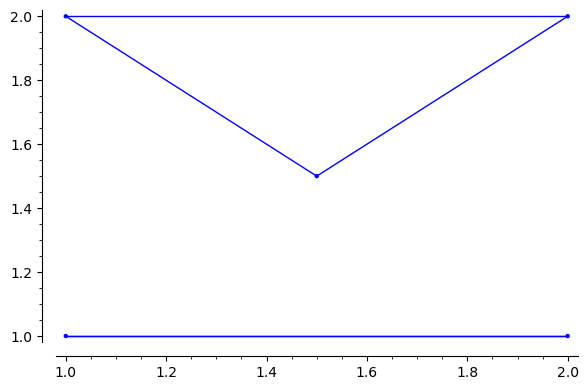

In [3]:
v = list_plot(coords)
sol = p.optimal_solution()

print(sol)

for i, val in enumerate(sol):
    if val == 1:
        print(i, edges[i])
        v = v + line(edges[i])
plot(v)

## Cięcie usuwające cykl

(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0)
0 ((1.0, 1.0), (2.0, 1.0))
5 ((2.0, 1.0), (2.0, 2.0))
10 ((2.0, 2.0), (1.0, 2.0))
15 ((1.0, 2.0), (1.5, 1.5))
16 ((1.5, 1.5), (1.0, 1.0))


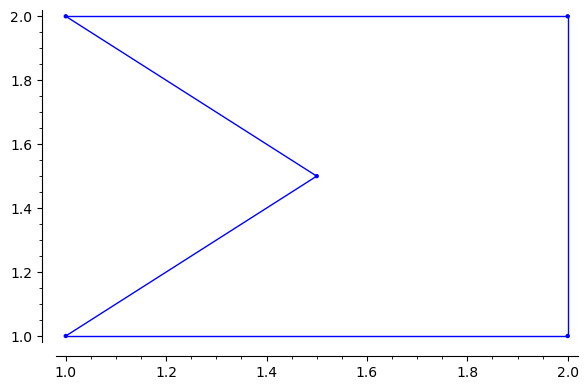

In [4]:
row = vector(QQ, len(edges))
row[0] = 1
row[4] = 1
A1 = A.stack(row)
b1 = b.stack(vector(QQ, [1]))
p1 = InteractiveLPProblemStandardForm(A1, b1, c, x=var_names)

v = list_plot(coords)
sol = p1.optimal_solution()

print(sol)

for i, val in enumerate(sol):2021-05-12-080601
    if val == 1:
        print(i, edges[i])
        v = v + line(edges[i])
plot(v)

## Inne cięcie - usuwające drugi cykl

(1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2/3, 1/3, 0, 0, 1/3, 2/3, 0, 0, 2/3, 1/3)
0 ((1.0, 1.0), (2.0, 1.0))
4 ((2.0, 1.0), (1.0, 1.0))


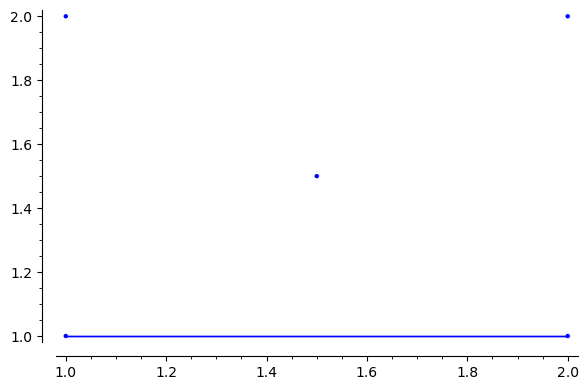

In [5]:
row = vector(QQ, len(edges))
row[10] = 1
row[15] = 1
row[18] = 1
A2 = A.stack(row)
b2 = b.stack(vector(QQ, [2]))
p2 = InteractiveLPProblemStandardForm(A2, b2, c, x=var_names)

v = list_plot(coords)
sol = p2.optimal_solution()

print(sol)

for i, val in enumerate(sol):
    if val == 1:
        print(i, edges[i])
        v = v + line(edges[i])
plot(v)